In [2]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString
import pandas as pd 
import seaborn as sns

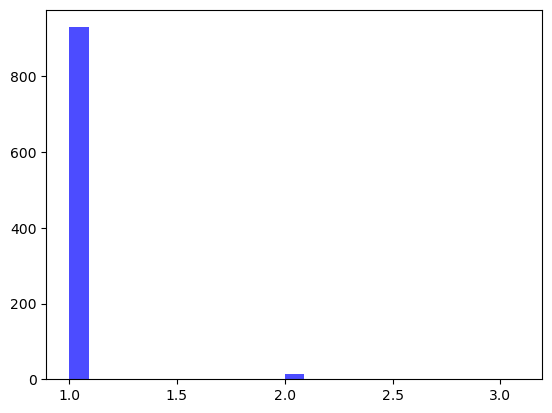

14
7950


In [49]:


file = uproot.open("dati/cilindrofan/150mev/coll/Hitsxp10.root")
tree = file["Hits"]

data = tree.arrays(library="pd")

annihil_data = data[data["processName"] == "annihil"]
brems_data = data[data["processName"] == "eBrem"]
#brems_data = brems_data[brems_data["energy"] >= 0.4]
#brems_data = brems_data[brems_data["energy"] <= 0.6]

# Group the filtered data by event and parentID, then count occurrences
grouped_data = annihil_data.groupby(["evt", "parentID"]).size().reset_index(name="count")

grouped_data_brem = brems_data.groupby(["evt"]).size().reset_index(name="count")

#print(grouped_data.head())

bins = [0.999, 1.09, 1.9999,2.09,2.9999, 3.09]

#plt.hist(grouped_data_brem["count"], bins=bins, label="brem", alpha=0.7, color="red")
plt.hist(grouped_data["count"], bins=bins, label="annihil", alpha=0.7, color="blue")
plt.show()

print(np.shape(grouped_data[grouped_data["count"]==2])[0])

print(np.shape(grouped_data_brem)[0])
#
#x=[0]
#plt.scatter(x,np.shape(grouped_data[grouped_data["count"]==2])[0],label="annihil_pair")
#plt.scatter(x,np.shape(grouped_data_brem)[0],label="brem")
#plt.legend()

In [23]:
print(data[data["processName"]=='eBrem'])

       EDep  xloc           x          y      z    energy       TOF  \
0       0.0   0.0 -103.369882  -2.651570 -299.0  0.065572  2.696079   
10      0.0   0.0 -106.147744 -10.175117  299.0  0.455036  2.702380   
11      0.0   0.0  -92.134503  -7.011695 -299.0  0.343609  3.033463   
43      0.0   0.0 -110.773144  -0.109744 -299.0  0.087071  2.738356   
44      0.0   0.0 -107.894021   7.732233  299.0  0.384795  2.913507   
...     ...   ...         ...        ...    ...       ...       ...   
40515   0.0   0.0  -94.803351 -12.257637  299.0  0.152786  2.590552   
40516   0.0   0.0  -90.518780  -1.650058 -299.0  0.318454  3.436643   
40556   0.0   0.0 -103.196718  -3.306888  299.0  0.208750  2.908464   
40590   0.0   0.0  -98.808767 -11.686336 -299.0  1.770603  2.707805   
40591   0.0   0.0  -90.391805   4.003081 -299.0  0.101582  2.759197   

      particleName processName      evt  parentID  
0            gamma       eBrem     3172         1  
10           gamma       eBrem     4799    

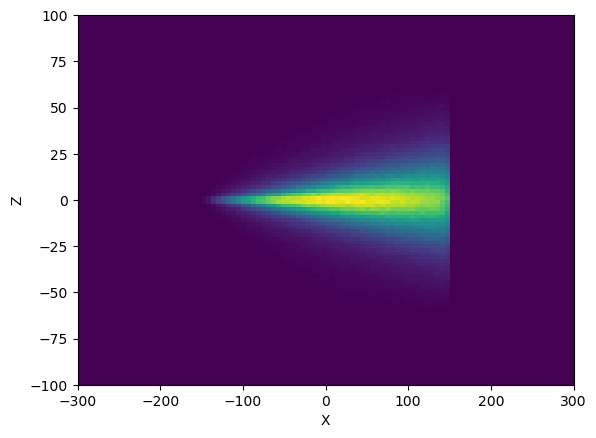

In [55]:
dt = np.genfromtxt('dati/cilindrofan/150mev/coll/annihilation_positions.csv', delimiter=',')


# Calculate depth (assuming depth is the z-coordinate)
x_values = dt[:,0]
z_values = dt[:,2]
y_values = dt[:,1]  


plt.hist2d(x_values,z_values, bins=(100,100), range=[[-300, 300], [-100, 100]], cmap='viridis')
plt.xlabel('X')
plt.ylabel('Z')
plt.show()

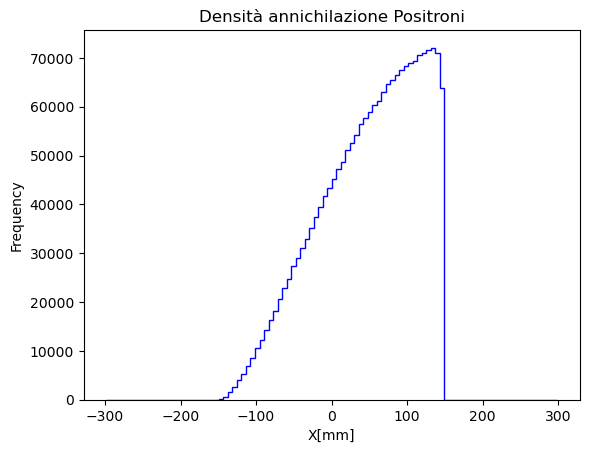

In [56]:
hist2d, x_edges, y_edges = np.histogram2d(x_values, z_values, bins=(200, 1), range=[[-300, 300], [-200, 200]])

slice_index = 0

# Extract the slice from the 2D histogram
hist_slice = hist2d[:, slice_index]

bin_centers_x = (x_edges[:-1] + x_edges[1:]) / 2

plt.hist(bin_centers_x, weights=hist_slice, color='blue', bins=100,histtype='step')

# Add labels and title
plt.xlabel('X[mm]')
plt.ylabel('Frequency')
plt.title('Densità annichilazione Positroni')

# Show the plot
plt.show()

TRUECOINC

In [35]:
pairs = pd.merge(data[(data['z'] > 0) & (data['processName'] == 'annihil')],
                 data[(data['z'] < 0) & (data['processName'] == 'annihil')], on='evt')

# Filter pairs with the same event number and a TOF difference < 2ns and same parent ID
#pairs = pairs[(pairs['parentID_x'] == pairs['parentID_y'])]




In [47]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(pairs.head(20))

           x_x        y_x    z_x  energy_x     TOF_x particleName_x  \
0   564.057337 -66.118614  299.0  0.510999  6.306654          gamma   
1  -348.449146  42.231830  299.0  0.510999  4.447753          gamma   
2    73.459525 -47.876568  299.0  0.510999  5.958445          gamma   
3   240.446730  55.459628  299.0  0.510999  6.075568          gamma   
4  -260.109591  71.378419  299.0  0.510999  5.144096          gamma   
5   727.791212 -61.377668  299.0  0.510999  6.831865          gamma   
6  -196.270638 -65.775054  299.0  0.510999  5.191691          gamma   
7    -8.767160  13.832311  299.0  0.510999  6.109796          gamma   
8   711.588555 -21.972679  299.0  0.510999  6.791437          gamma   
9   318.260098 -28.307272  299.0  5.338019  5.536626          gamma   
10  -71.929019 -60.571094  299.0  0.510999  5.494361          gamma   
11   73.188145  79.421427  299.0  0.510999  5.592473          gamma   
12  187.569808 -25.098186  299.0  0.510999  6.403520          gamma   
13 -14

In [82]:
#tolerance = 10  # You can adjust the tolerance as needed
#
#pairs.loc[(abs(pairs['y_x']) < tolerance) & (abs(pairs['y_y']) < tolerance), ['y_x', 'y_y']] = 0
#
#pairs = pairs.loc[(pairs['y_x'] == 0) & (pairs['y_y'] == 0)]
#
## Reset index if needed
#pairs.reset_index(drop=True, inplace=True)

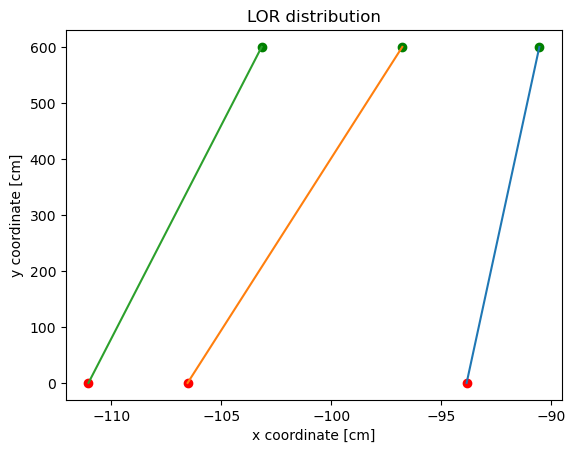

In [36]:

x1 = np.array(pairs['x_x']) # X positions of the first scintillator
x2 = np.array(pairs['x_y']) # X positions of the second scintillator

# Calculate the midpoint between the two scintillators
midpoint = (x1 + x2) / 2

# Calculate the slope of the line connecting the two scintillators
slope = (x2 - x1)

# Calculate the y-intercept of the line connecting the two scintillators
intercept = np.zeros_like(midpoint)  
# Distance between the scintillators
distance = 600.0  # cm

y_values = np.zeros_like(x1)  



for i in range(len(x1)):
    x_values = np.array([x1[i], x2[i]])
    plt.plot(x_values, y_values[i] + np.array([0, distance]))

plt.scatter(x1, y_values, c='r')
plt.scatter(x2, y_values + distance, c='g')

plt.xlabel('x coordinate [cm]')
plt.ylabel('y coordinate [cm]')
plt.title('LOR distribution')
plt.show()
y=np.linspace(-300,300,300)



lines1 = [LineString([(x1[i], -300), (x2[i], 300)]) for i in range(len(x2))]
lines2 = [LineString([(-1000, y[j]), (1000, y[j])]) for j in range(len(y))]

distry=np.zeros((len(x1),len(y)))
# Loop through and calculate intersections
for j in range(len(y)):
    for i in range(len(x2)):
        x = (lines1[i].intersection(lines2[j])).x
        distry[i, j] = x
      

In [60]:
print(distry)

[[-256.41377523]
 [ 152.18582022]
 [ 353.90072038]
 ...
 [ 249.08933757]
 [-381.46647693]
 [-132.30357799]]


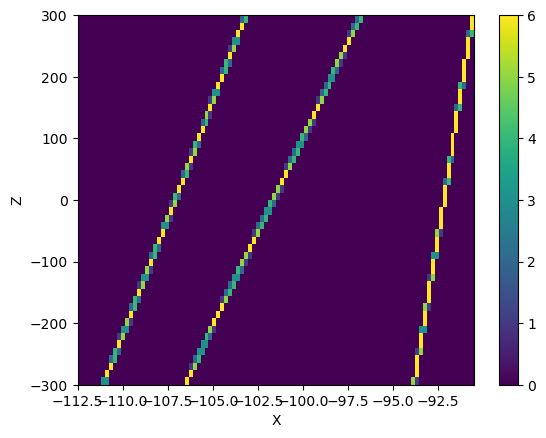

In [41]:
y = np.linspace(-300,300,distry.shape[1])
#plt.figure(figsize=(10,10))

x_flattened = distry.flatten()
y_flattened = np.tile(y, distry.shape[0])

mask = ~np.isnan(x_flattened)
x_filtered1 = x_flattened[mask]
y_filtered1 = y_flattened[mask]

plt.hist2d(x_filtered1, y_filtered1, bins=[100,50], cmap='viridis',range=[[-112.5, -90.5], [-300, 300]])

plt.colorbar()
plt.xlabel('X')
plt.ylabel('Z')

plt.show()





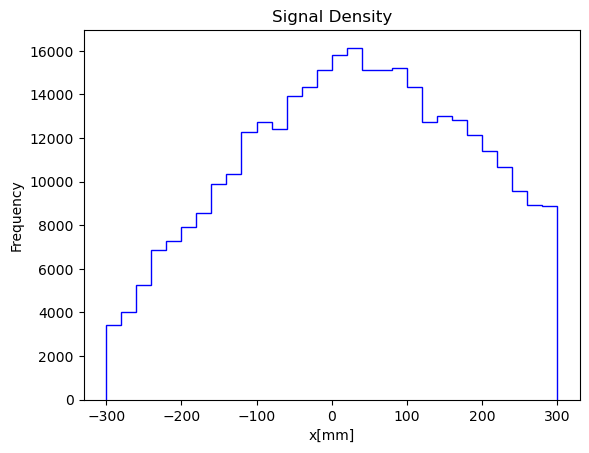

In [131]:
hist2d, x_edges, y_edges = np.histogram2d(x_filtered1, y_filtered1, bins=(30, 1),range=[[-300,300],[-100,100]])

slice_index = 0

# Extract the slice from the 2D histogram
hist_slice = hist2d[:, slice_index]

bin_centers_x = (x_edges[:-1] + x_edges[1:]) / 2

plt.hist(bin_centers_x, weights=hist_slice, color='blue', bins=30
         ,histtype='step',range=[-300,300])

# Add labels and title
plt.xlabel('x[mm]')
plt.ylabel('Frequency')
plt.title('Signal Density')

# Show the plot
plt.show()

TUTTI EVT

In [10]:
pairs = pd.merge(data[(data['z'] > 0)],
                 data[(data['z'] < 0)], on='evt')# Filter pairs with the same event number and a TOF difference < 2ns
pairs = pairs[(pairs['TOF_x'] - pairs['TOF_y']).abs() < 2]


FOllia

In [3]:
pairs = pd.merge(data[(data['z'] > 0)],
                 data[(data['z'] < 0)],on='processName')# Filter pairs with the same event number and a TOF difference < 2ns
#pairs = pairs[(pairs['TOF_x'] - pairs['TOF_y']).abs() < 2]


In [11]:
print(pairs.head(20))

   EDep_x  xloc_x        x_x        y_x    z_x  energy_x     TOF_x  \
0     0.0     0.0 -10.922223   3.382496  299.0  0.510999  2.968309   
1     0.0     0.0   4.821084  -9.717354  299.0  0.510999  3.089775   
2     0.0     0.0  -0.611541   3.081376  299.0  0.510999  2.980224   
3     0.0     0.0  -4.326028  -0.919924  299.0  2.282691  3.005052   
4     0.0     0.0  -7.115296  -5.985284  299.0  0.510999  2.962303   
5     0.0     0.0   3.311470  -0.522100  299.0  0.510999  3.028788   
6     0.0     0.0   2.915798  -1.468986  299.0  0.510999  3.037271   
7     0.0     0.0  -5.826505  -2.682437  299.0  0.510999  3.003908   
8     0.0     0.0  10.816182 -10.889601  299.0  0.510999  3.105353   
9     0.0     0.0   7.349858   2.567628  299.0  0.510999  3.026265   

  particleName_x processName_x      evt  ...  EDep_y  xloc_y        x_y  \
0          gamma       annihil   140543  ...     0.0     0.0 -12.158204   
1          gamma       annihil  2080740  ...     0.0     0.0  -4.173856   
2   

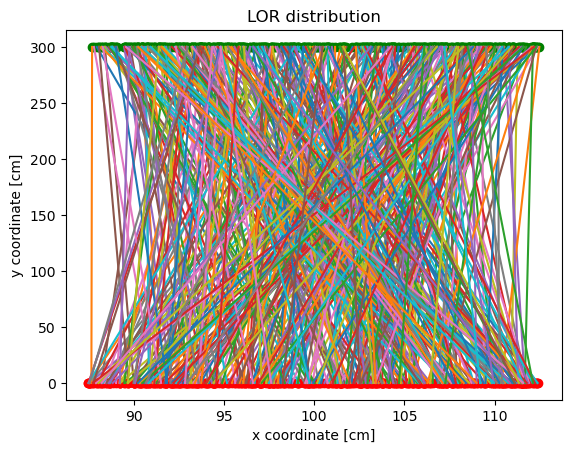

In [51]:

#x1 = np.array(pairs['x_x'].head(30000)) # X positions of the first scintillator
#x2 = np.array(pairs['x_y'].head(30000)) # X positions of the second scintillator
data=data[(data['processName'] == 'annihil')]
data1 = data[(data['z'] > 0)]   
data2 = data[(data['z'] < 0)]
x1 = np.array(data1['x'].head(470)) # X positions of the first scintillator
x2 = np.array(data2['x'].head(470)) # X positions of the second scintillator

# Calculate the midpoint between the two scintillators
midpoint = (x1 + x2) / 2

# Calculate the slope of the line connecting the two scintillators
slope = (x2 - x1)

# Calculate the y-intercept of the line connecting the two scintillators
intercept = np.zeros_like(midpoint)  
# Distance between the scintillators
distance = 300.0  # cm

y_values = np.zeros_like(x1)  



for i in range(len(x1)):
    x_values = np.array([x1[i], x2[i]])
    plt.plot(x_values, y_values[i] + np.array([0, distance]))

plt.scatter(x1, y_values, c='r')
plt.scatter(x2, y_values + distance, c='g')

plt.xlabel('x coordinate [cm]')
plt.ylabel('y coordinate [cm]')
plt.title('LOR distribution')
plt.show()




      


In [41]:
print(np.shape(data2))

(3969, 11)


In [52]:
y=np.linspace(-300,300,300)


lines1 = [LineString([(x1[i], -300), (x2[i], 300)]) for i in range(len(x2))]
lines2 = [LineString([(-1000, y[j]), (1000, y[j])]) for j in range(len(y))]

distry=np.zeros((len(x1),len(y)))
# Loop through and calculate intersections
for j in range(len(y)):
    for i in range(len(x2)):
        x = (lines1[i].intersection(lines2[j])).x
        distry[i, j] = x

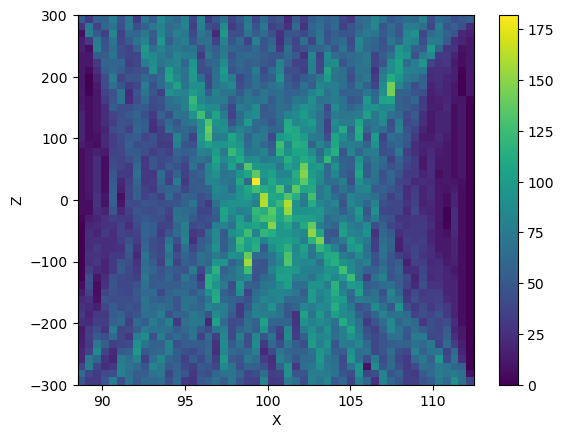

In [54]:
y = np.linspace(-300,300,distry.shape[1])

x_flattened = distry.flatten()
y_flattened = np.tile(y, distry.shape[0])

mask = ~np.isnan(x_flattened)
x_filtered1 = x_flattened[mask]
y_filtered1 = y_flattened[mask]

plt.hist2d(x_filtered1, y_filtered1, bins=[50,50], cmap='viridis',range=[[88.5, 112.5],[-300,300]])

plt.colorbar()

plt.xlabel('X')
plt.ylabel('Z')

plt.show()



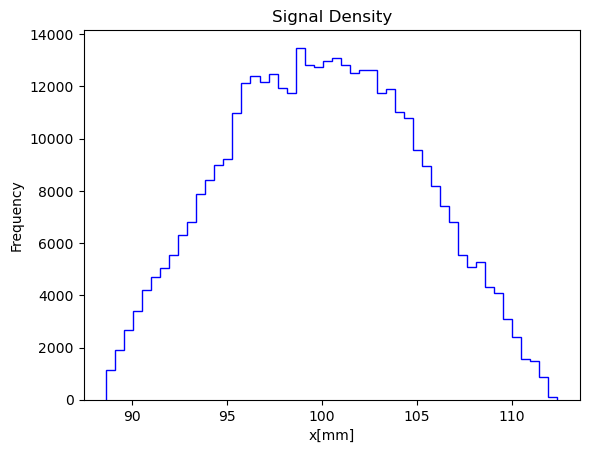

In [46]:
hist2d, x_edges, y_edges = np.histogram2d(x_filtered1, y_filtered1, bins=(100, 1),range=[[88.5, 112.5],[-100,100]])

slice_index = 0

# Extract the slice from the 2D histogram
hist_slice = hist2d[:, slice_index]

bin_centers_x = (x_edges[:-1] + x_edges[1:]) / 2

plt.hist(bin_centers_x, weights=hist_slice, color='blue', bins=50
         ,histtype='step')

# Add labels and title
plt.xlabel('x[mm]')
plt.ylabel('Frequency')
plt.title('Signal Density')

# Show the plot
plt.show()

custom

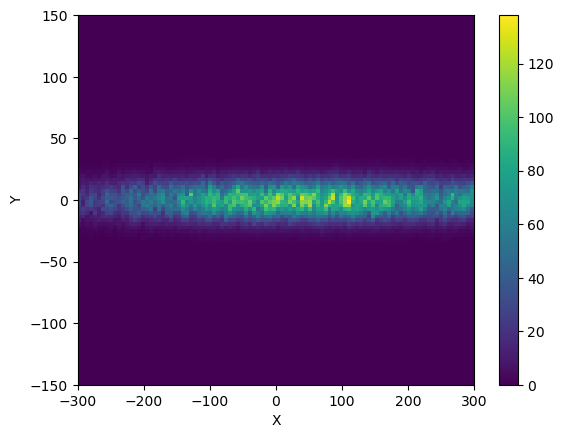

In [26]:
def custom_weighting_function(x, y):
    # You can adjust the parameters in the following formula to suit your specific criteria
    weight =  np.exp( 7* y**2*-0.0006)*np.exp(0.000001*x**2)
    return weight

# Use the custom weighting function in your code
weights = custom_weighting_function(x_filtered1, y_filtered1)

plt.hist2d(x_filtered1, y_filtered1, bins=[100, 100], cmap='viridis', range=[[-300, 300], [-150, 150]], weights=weights)

plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

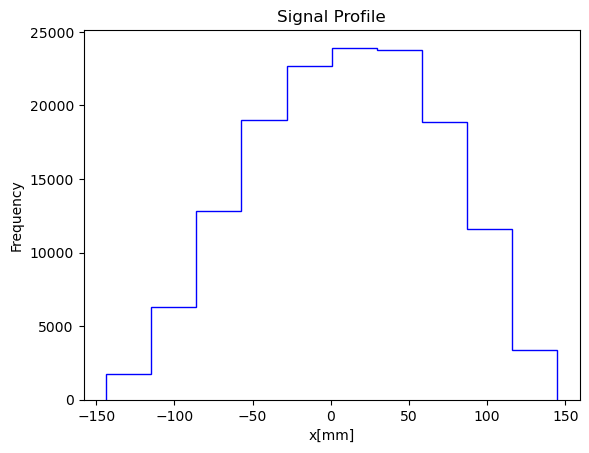

In [ ]:
hist2d, x_edges, y_edges = np.histogram2d(x_filtered1, y_filtered1, bins=(30, 30))

slice_index = 5

# Extract the slice from the 2D histogram
hist_slice = hist2d[:, slice_index]

bin_centers_x = (x_edges[:-1] + x_edges[1:]) / 2

plt.hist(bin_centers_x, weights=hist_slice, color='blue', bins=10,histtype='step')

# Add labels and title
plt.xlabel('x[mm]')
plt.ylabel('Frequency')
plt.title('Signal Profile')

# Show the plot
plt.show()